# Exercise Sheet 01: Data preprocessing, visualization, correlation, statistical testing, and modeling

**Introduction to Data Mining WS24/25**  
**Bielefeld University**  
**Alina Deriyeva, Adia Khalid, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2024-10-23**  
**Exercise Sheet Submission Deadline: Friday, 2024-11-01, noon (i.e. 12:00), via moodle**

**NOTE** The use of language models/AI tools is permitted under three conditions
1. transparency: you tell us that you used them
2. accountability: you take full responsibility for the submission, can explain and defend it
3. privacy: you do not transmit any private information to any external tool

We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool for research purposes.

**Authors:**
Swetlana Savonin, Maurice Meise, Niklas Nebeling

## Probabilistic Modeling

Let's assume that a student does a test on a single topic in which they can achieve a certain number of points. Let's further assume that the probability that the student has understood the topic is denoted as $p \in [0, 1]$. Finally, let's assume that the number of points on the test Gaussian distributed with standard deviation $\sigma > 0$. However, the mean of the distribution depends on whether the student has understood the topic or not.

### Task 01.01

Formalize this scenario. In particular:
1. Model a random variable $Z$ that indicates whether the student understood the topic or not. What is the domain? What is the probability mass function $p_Z$? What are the parameters of this function?
2. Model a random variable $X$ for the number of points the student achieves on the test. What is the conditional probability density function $p_{X|Z}$? What are the parameters of this function?

**ANSWER:** PLEASE PROVIDE LATEX CODE OR AN IMAGE OF YOUR DERIVATION HERE

1. Let $Z$ be a binary random variable that represents whether a student has understood the topic or not.
- Domain: $Z \in [0, 1]$
  - $Z$ = 1: The student understood the topic
  - $Z$ = 0: The student did not understand the topic.
- Probability mass function: $p_Z$
  - $p$ := probability that a student understood the topic
  - $p(Z = 1) = p$
  - $p(Z = 0) = 1-p$

2. Let $X$ represent the number of points the student achieves on the test.
- Conditional probability density function $p_{X|Z}$:
  - The Gaussian distribution is used because test scores typically approximate a normal distribution.
  - If the student understood the topic §(Z = 1)§, their scroe §X§ follows a Gaussian distribution with mean $\mu_1$ and standard deviation $\sigma$: $X \mid Z=1 \sim \mathcal{N}(\mu_1, \sigma^2)$
  - If the student did not understood the topic §(Z = 0)§, their scroe §X§ follows a Gaussian distribution with mean $\mu_0$ and standard deviation $\sigma$: $X \mid Z=1 \sim \mathcal{N}(\mu_0, \sigma^2)$

- Parameters:
  - $p$: Probability that the student understood the topic
  - $\mu_0, \mu_1$: Expected scores based on whether the student understood the topic
  - $\sigma$: Standard deviation of the scores assuming it’s the same regardless of understanding.



### Task 01.02

Using Bayes' theorem and the law of total probability, compute the conditional probability mass $p_{Z|X}(1|x)$ for the student having understood the topic given their achieved number of points.

**ANSWER:** PLEASE PROVIDE LATEX CODE OR AN IMAGE OF YOUR DERIVATION HERE

\begin{align*}
\text{1. Bayes' Theorem:} \\
& p_{Z|X}(1|x) = \frac{p_{X|Z}(x|1) \cdot p_Z(1)}{p_X(x)} \\[10pt]

\text{2. Calculate } p_X(x) \text{ using the law of total probability:} \\
& p_X(x) = p_{X|Z}(x|1) \cdot p_Z(1) + p_{X|Z}(x|0) \cdot p_Z(0) \\[10pt]

\text{3. Insert } p_X(x) \text{ in Bayes' Theorem:} \\
& p_{Z|X}(1|x) = \frac{p_{X|Z}(x|1) \cdot p_Z(1)}{p_{X|Z}(x|1) \cdot p_Z(1) + p_{X|Z}(x|0) \cdot p_Z(0)} \\[10pt]

\text{Result:} \\
& \text{The conditional probability } p_{Z|X}(1|x) \text{ represents the probability that the student} \\
& \text{understood the topic given the score } x.
\end{align*}


### Task 01.03

Assume that the numbers $x_1, \ldots, x_m \in \mathbb{R}$ are generated (independently) from a Gaussian with mean $\mu$ and standard deviation $\sigma$.

1. What is the negative log likelihood of the data under this assumption?
2. Prove that $\mu$ and $\sigma^2$ which minimize the negative log likelihood are exactly $\mu = \frac{1}{m} \sum_{i=1}^m x_i$ and $\sigma^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu)^2$. You may assume that the negative log likelihood is convex, in this case.

For this task, we used Chat-Gpt. The Input was the task description and some further prompts to receive a detailed derivation. 

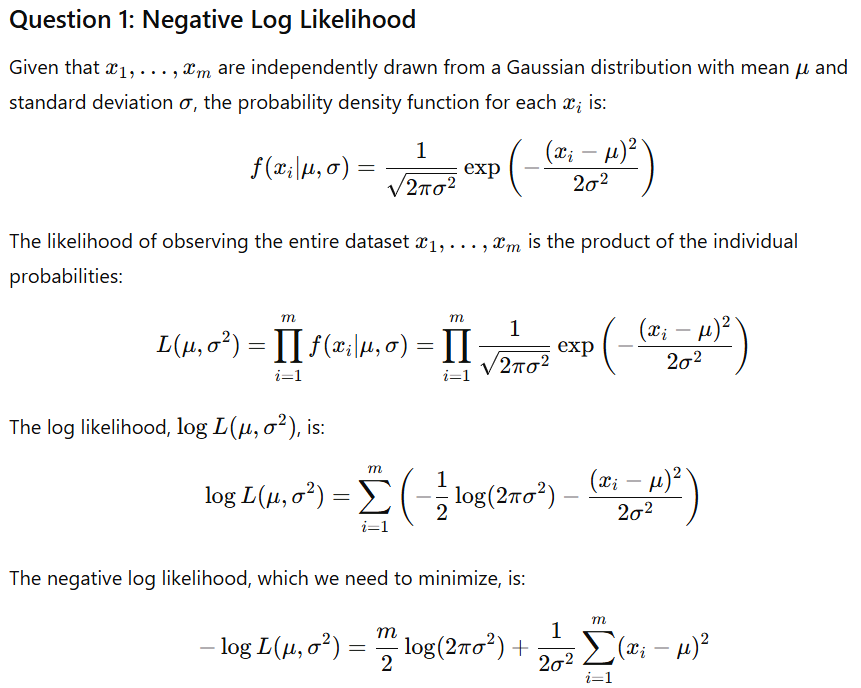

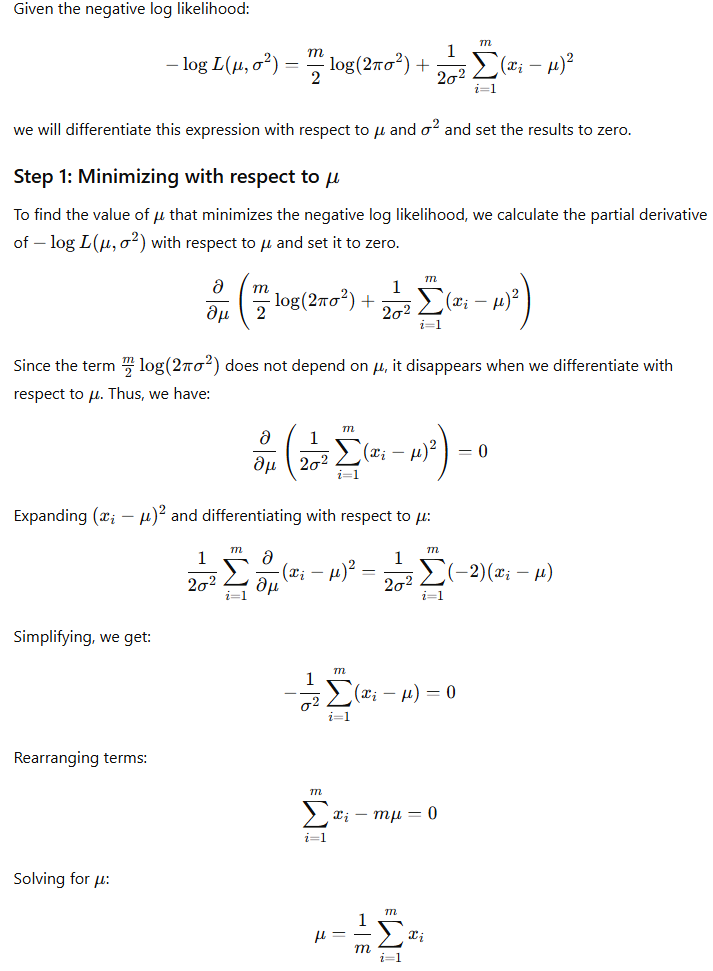

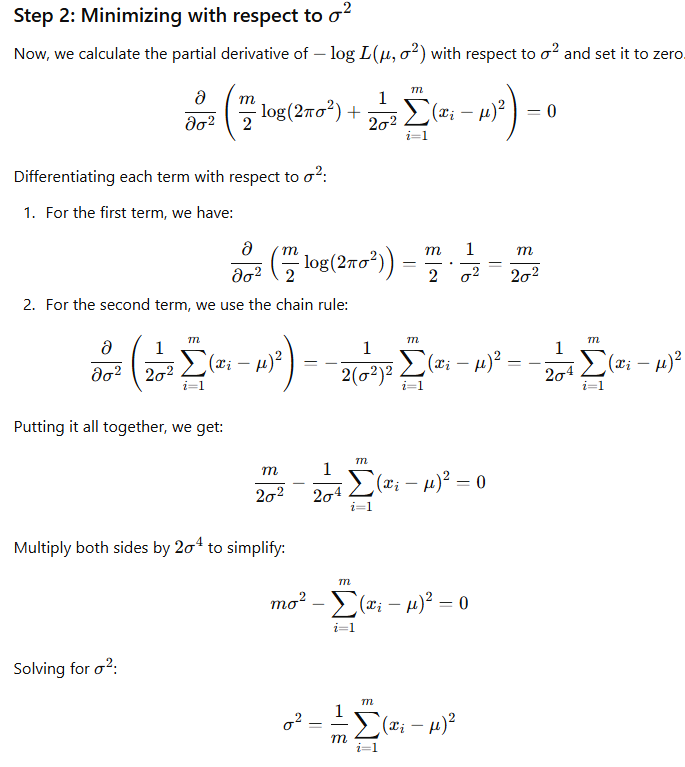

## Example data set

In this exercise sheet, we investigate first data exploration activities that can be performed on typical, tabular data sets, up to simple statistical testing.

The file `sheet01_data.csv` contains fictional data as might be produced in an educational study. Each row represents a student participating in the study. The first column is just the student index, the second column indicates the experimental condition the student was in (`0` for control group, `1` for intervention group). The third column is the student's test result on a pre-test, the fourth column is the student's test result on a post-test.

The following line loads this raw data and prints it.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

X = np.loadtxt('sheet01_data.csv', skiprows = 1, delimiter = '\t')
print(X)

[[  0.   0.  27.  40.]
 [  1.   0.  31.  34.]
 [  2.   0.  30.  nan]
 [  3.   0.  20.  nan]
 [  4.   0.  41.  54.]
 [  5.   0.  39.  51.]
 [  6.   0.  20.  33.]
 [  7.   0.  27.  36.]
 [  8.   0.  79.  83.]
 [  9.   0.  33.  46.]
 [ 10.   0.  22.  29.]
 [ 11.   0.  22.  41.]
 [ 12.   0.  29.  nan]
 [ 13.   0.  25.  nan]
 [ 14.   0.  41.  47.]
 [ 15.   0.  23.  36.]
 [ 16.   0.  17.  30.]
 [ 17.   0.  93. 100.]
 [ 18.   0.  34.  40.]
 [ 19.   0.  23.  27.]
 [ 20.   0.  48.  53.]
 [ 21.   0.  19.  26.]
 [ 22.   0.  28.  33.]
 [ 23.   0.  38.  46.]
 [ 24.   0.  22.  34.]
 [ 25.   0.  34.  45.]
 [ 26.   0.  36.  49.]
 [ 27.   0.  33.  47.]
 [ 28.   0.  40.  41.]
 [ 29.   0.  39.  52.]
 [ 30.   1.  24.  50.]
 [ 31.   1.  38.  62.]
 [ 32.   1.  34.  51.]
 [ 33.   1.  37.  nan]
 [ 34.   1.  31.  44.]
 [ 35.   1.  37.  57.]
 [ 36.   1.  25.  50.]
 [ 37.   1.  23.  37.]
 [ 38.   1.  12.  38.]
 [ 39.   1.  31.  56.]
 [ 40.   1.  36.  46.]
 [ 41.   1.  34.  48.]
 [ 42.   1.  85. 100.]
 [ 43.   1.

### Task 01.04

Write python code to automatically identify outliers, which are defined as any students with a pre-test score higher than 3 standard deviations above the mean. Write python code that removes these outliers from the data set.

In [ ]:
preTestScores = X[:, 2]

meanPreTest = np.mean(preTestScores)
stdPreTest = np.std(preTestScores)

outliers = np.where(preTestScores > meanPreTest + 3 * stdPreTest)

Xwo = np.delete(X, outliers, axis=0)

print("Data without outliers:")
print(Xwo)


Data without outliers:
[[ 0.  0. 27. 40.]
 [ 1.  0. 31. 34.]
 [ 2.  0. 30. nan]
 [ 3.  0. 20. nan]
 [ 4.  0. 41. 54.]
 [ 5.  0. 39. 51.]
 [ 6.  0. 20. 33.]
 [ 7.  0. 27. 36.]
 [ 9.  0. 33. 46.]
 [10.  0. 22. 29.]
 [11.  0. 22. 41.]
 [12.  0. 29. nan]
 [13.  0. 25. nan]
 [14.  0. 41. 47.]
 [15.  0. 23. 36.]
 [16.  0. 17. 30.]
 [18.  0. 34. 40.]
 [19.  0. 23. 27.]
 [20.  0. 48. 53.]
 [21.  0. 19. 26.]
 [22.  0. 28. 33.]
 [23.  0. 38. 46.]
 [24.  0. 22. 34.]
 [25.  0. 34. 45.]
 [26.  0. 36. 49.]
 [27.  0. 33. 47.]
 [28.  0. 40. 41.]
 [29.  0. 39. 52.]
 [30.  1. 24. 50.]
 [31.  1. 38. 62.]
 [32.  1. 34. 51.]
 [33.  1. 37. nan]
 [34.  1. 31. 44.]
 [35.  1. 37. 57.]
 [36.  1. 25. 50.]
 [37.  1. 23. 37.]
 [38.  1. 12. 38.]
 [39.  1. 31. 56.]
 [40.  1. 36. 46.]
 [41.  1. 34. 48.]
 [43.  1. 41. 59.]
 [44.  1. 14. 37.]
 [45.  1.  7. 29.]
 [46.  1. 30. 54.]
 [47.  1. 42. 62.]
 [48.  1. 25. 44.]
 [49.  1. 29. 53.]
 [50.  1. 17. 40.]
 [51.  1. 40. 63.]
 [52.  1. 29. 46.]
 [53.  1. 33. nan]
 [54.  1

Print how many points are left in the control group and the intervention group after outlier removal

In [ ]:
controlGroup = Xwo[:, 1] == 0
controlGroupPoints = np.sum(controlGroup)
interventionGroup = Xwo[:, 1] == 1
interventionGroupPoints = np.sum(interventionGroup)

print(f"Control group: {controlGroupPoints}")
print(f"Intervention group: {interventionGroupPoints}")

Control group: 28
Intervention group: 29


### Task 01.05

Write python code to compute the mean pre- and post-test score, as well as the respective standard deviation, of the control group and the intervention group. Be aware of nan values. Print the results.

In [ ]:
controlGroupData = np.delete(Xwo, interventionGroup, axis=0)
CG_preTestScores = controlGroupData[:, 2]
CG_postTestScores = controlGroupData[:, 3]

CG_meanPreTest = np.nanmean(CG_preTestScores)
CG_stdPreTest = np.nanstd(CG_preTestScores)
CG_meanPostTest = np.nanmean(CG_postTestScores)
CG_stdPostTest = np.nanstd(CG_postTestScores)

print("Control group:")
print(f" - Mean Pre-Test Score: {CG_meanPreTest:.2f}")
print(f" - Standard Deviation Pre-Test Score: {CG_stdPreTest:.2f}")
print(f" - Mean Post-Test Score: {CG_meanPostTest:.2f}")
print(f" - Standard Deviation Post-Test Score: {CG_stdPostTest:.2f}")

interventionGroupData = np.delete(Xwo, controlGroup, axis=0)
IG_preTestScores = interventionGroupData[:, 2]
IG_postTestScores = interventionGroupData[:, 3]

IG_meanPreTest = np.nanmean(IG_preTestScores)
IG_stdPreTest = np.nanstd(IG_preTestScores)
IG_meanPostTest = np.nanmean(IG_postTestScores)
IG_stdPostTest = np.nanstd(IG_postTestScores)

print("\nIntervention group:")
print(f" - Mean Pre-Test Score: {IG_meanPreTest:.2f}")
print(f" - Standard Deviation Pre-Test Score: {IG_stdPreTest:.2f}")
print(f" - Mean Post-Test Score: {IG_meanPostTest:.2f}")
print(f" - Standard Deviation Post-Test Score: {IG_stdPostTest:.2f}")

print("\nAll values are rounded to the second decimal place")



Control group:
 - Mean Pre-Test Score: 30.04
 - Standard Deviation Pre-Test Score: 8.03
 - Mean Post-Test Score: 40.42
 - Standard Deviation Post-Test Score: 8.40

Intervention group:
 - Mean Pre-Test Score: 30.21
 - Standard Deviation Pre-Test Score: 9.15
 - Mean Post-Test Score: 50.12
 - Standard Deviation Post-Test Score: 9.07

All values are rounded to the second decimal place


### Task 01.06

Write python code to impute the missing values (that means: nan values) in the post test scores by the mean of the data. HOWEVER, the imputation should be done separately for the control and the intervention group.

In [ ]:
# The mean was rounded

for i in range(len(controlGroupData)):
    if np.isnan(controlGroupData[i, 3]):
        controlGroupData[i, 3] = round(CG_meanPostTest)

#print(controlGroupData)

for i in range(len(interventionGroupData)):
    if np.isnan(interventionGroupData[i, 3]):
        interventionGroupData[i, 3] = round(IG_meanPostTest)

#print(interventionGroupData)


XImputed = np.vstack((controlGroupData, interventionGroupData))

print("Data with imputed missing values in post-test scores:")
print(XImputed)


Data with imputed missing values in post-test scores:
[[ 0.  0. 27. 40.]
 [ 1.  0. 31. 34.]
 [ 2.  0. 30. 40.]
 [ 3.  0. 20. 40.]
 [ 4.  0. 41. 54.]
 [ 5.  0. 39. 51.]
 [ 6.  0. 20. 33.]
 [ 7.  0. 27. 36.]
 [ 9.  0. 33. 46.]
 [10.  0. 22. 29.]
 [11.  0. 22. 41.]
 [12.  0. 29. 40.]
 [13.  0. 25. 40.]
 [14.  0. 41. 47.]
 [15.  0. 23. 36.]
 [16.  0. 17. 30.]
 [18.  0. 34. 40.]
 [19.  0. 23. 27.]
 [20.  0. 48. 53.]
 [21.  0. 19. 26.]
 [22.  0. 28. 33.]
 [23.  0. 38. 46.]
 [24.  0. 22. 34.]
 [25.  0. 34. 45.]
 [26.  0. 36. 49.]
 [27.  0. 33. 47.]
 [28.  0. 40. 41.]
 [29.  0. 39. 52.]
 [30.  1. 24. 50.]
 [31.  1. 38. 62.]
 [32.  1. 34. 51.]
 [33.  1. 37. 50.]
 [34.  1. 31. 44.]
 [35.  1. 37. 57.]
 [36.  1. 25. 50.]
 [37.  1. 23. 37.]
 [38.  1. 12. 38.]
 [39.  1. 31. 56.]
 [40.  1. 36. 46.]
 [41.  1. 34. 48.]
 [43.  1. 41. 59.]
 [44.  1. 14. 37.]
 [45.  1.  7. 29.]
 [46.  1. 30. 54.]
 [47.  1. 42. 62.]
 [48.  1. 25. 44.]
 [49.  1. 29. 53.]
 [50.  1. 17. 40.]
 [51.  1. 40. 63.]
 [52.  1. 29. 4

## Data Visualization

### Task 01.07

Display two scatter plots (via `matplotlib.pyplot.scatter`), one for the control group and one for the intervention group, with pre-test score on the x-axis and post-test score on the y-axis. Label the axis and give the plots titles. Interpret these plot: Do you believe that pre- and post-test score correlate?

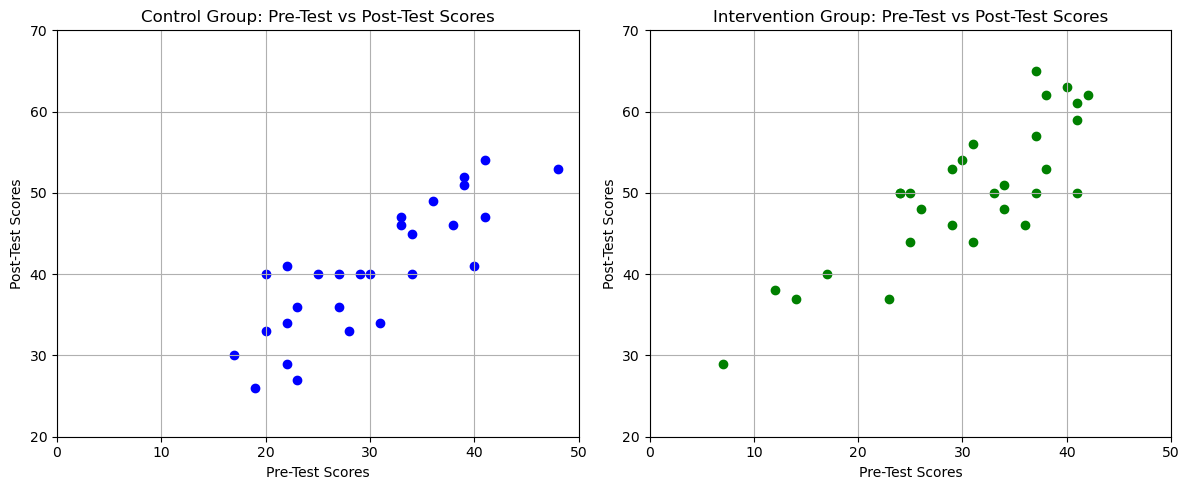

In [ ]:
# Create scatter plot for control group
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.axis([0,50,20,70])
plt.scatter(CG_preTestScores, CG_postTestScores, color='blue')
plt.title('Control Group: Pre-Test vs Post-Test Scores')
plt.xlabel('Pre-Test Scores')
plt.ylabel('Post-Test Scores')
plt.grid(True)

# Create scatter plot for intervention group
plt.subplot(1, 2, 2)
plt.axis([0,50,20,70])
plt.scatter(IG_preTestScores, IG_postTestScores, color='green')
plt.title('Intervention Group: Pre-Test vs Post-Test Scores')
plt.xlabel('Pre-Test Scores')
plt.ylabel('Post-Test Scores')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

**ANSWER:**
Both plots show a clear upward trend. This indicates that pre-test scores are positively correlated with post-test scores for both groups. This means that students with higher pre-test scores also tend to have higher post-test scores.

### Task 01.08

Display a bar plot with four bars (with error bars): pre-test mean (with standard error) for control and intervention group; and post-test mean (with standard error) for control and intervention group. Label the axes. Interpret this plot: Where are significant differences, do you think? What is your explanation for these differences?

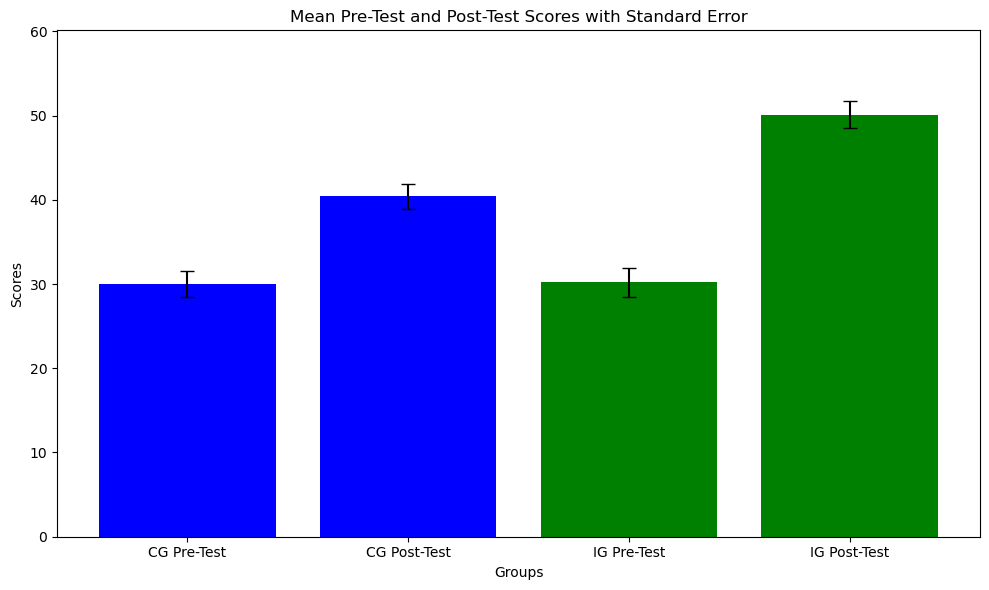

In [ ]:
import math
def std_error(data):
    return np.std(data)/math.sqrt(len(data))

# Bar plot data
labels = ['CG Pre-Test', 'CG Post-Test', 'IG Pre-Test', 'IG Post-Test']
means = [CG_meanPreTest, CG_meanPostTest, IG_meanPreTest, IG_meanPostTest]
errors = [std_error(CG_preTestScores), std_error(CG_postTestScores), std_error(IG_preTestScores), std_error(IG_postTestScores)]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, means, yerr=errors, color=['blue', 'blue', 'green', 'green'], capsize=5)

# Add titles and labels
plt.title('Mean Pre-Test and Post-Test Scores with Standard Error')
plt.ylabel('Scores')
plt.xlabel('Groups')
plt.ylim(0, max(means) + 10)  # Adjust y-axis limits for better visibility

# Show the plot
plt.tight_layout()
plt.show()

**ANSWER:**
 The post-test mean for the intervention group (IG) is significantly higher than both the pre-test mean for the intervention group and the post-test mean for the control group, this suggests that the intervention had a positive effect.

 Intervention Effectiveness:
 The intervention group shows a significant increase in post-test scores compared to the control group, it may imply that the intervention was effective in enhancing learning or performance.

### Task 01.09

Display a bar plot with two bars (with error bars): the average difference between post- and pre-test score for the control group (with standard error) and for the intervention group (with standard error). Label the axes. Interpret this plot: Do you think the difference of post- and pre-test scores significantly differs between control and intervention group?

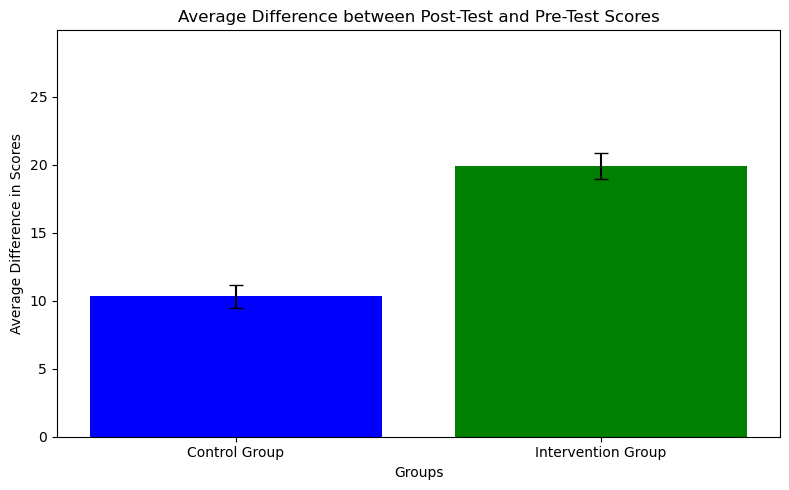

In [ ]:
# Calculate the differences
CG_differences = abs(controlGroupData[:,2] - controlGroupData[:,3])
IG_differences = abs(interventionGroupData[:,2] - interventionGroupData[:,3])


# Calculate means and standard errors of differences
CG_diff_mean = np.mean(CG_differences)
IG_diff_mean = np.mean(IG_differences)

CG_diff_se = np.std(CG_differences) / np.sqrt(len(CG_differences))
IG_diff_se = np.std(IG_differences) / np.sqrt(len(IG_differences))

# Bar plot data
labels = ['Control Group', 'Intervention Group']
means = [CG_diff_mean, IG_diff_mean]
errors = [CG_diff_se, IG_diff_se]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, means, yerr=errors, color=['blue', 'green'], capsize=5)

# Add titles and labels
plt.title('Average Difference between Post-Test and Pre-Test Scores')
plt.ylabel('Average Difference in Scores')
plt.xlabel('Groups')
plt.ylim(0, max(means) + 10)  # Adjust y-axis limits for better visibility

# Show the plot
plt.tight_layout()
plt.show()

**ANSWER:**
The mean difference for the intervention group is higher than that for the control group and the error bars do not overlap, suggesting that the intervention had a significant positive impact on the outcomes.

## Statistical Testing

### Task 01.10

Write a python function to compute the Pearson correlation between two arrays of the same size.

In [ ]:
def pearson_correlation(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    m = len(x)
    r = 0
    for i in range (0,m):
        r += ((x[i]-x_mean)/x_std)*((y[i]-y_mean)/y_std)
    r /= m
    return r

# Example usage
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
correlation = pearson_correlation(x, y)
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.9999999999999998


### Task 01.11

Use your function to compute the Pearson correlation between pre-test and post-test scores for both control and intervention condition and print the scores.

Interpret the strength of the correlation using the following rule of thumb from [Mukaka (2012)](https://www.ajol.info/index.php/mmj/article/download/81576/71739):

* A correlation of $0.3 < |r| \leq 0.5$ is considered small.
* A correlation of $0.5 < |r| \leq 0.7$ is considered moderate.
* A correlation of $0.7 < |r| \leq 0.9$ is considered high.
* A correlation of $0.9 < |r| \leq 1.0$ is considered very high.

In [ ]:
# Compute Pearson correlations
correlation_CG = pearson_correlation(CG_preTestScores, CG_postTestScores)
correlation_IG = pearson_correlation(IG_preTestScores, IG_postTestScores)

# Print the results
print("Pearson correlation for Control Group (Pre-Test vs Post-Test):", correlation_CG)
print("Pearson correlation for Intervention Group (Pre-Test vs Post-Test):", correlation_IG)

# Interpret the strength of the correlations
def interpret_correlation(r):
    if abs(r) <= 0.3:
        return "Very weak or no correlation"
    elif 0.3 < abs(r) <= 0.5:
        return "Small correlation"
    elif 0.5 < abs(r) <= 0.7:
        return "Moderate correlation"
    elif 0.7 < abs(r) <= 0.9:
        return "High correlation"
    elif 0.9 < abs(r) <= 1.0:
        return "Very high correlation"

# Print interpretations
print("Interpretation for Control Group correlation:", interpret_correlation(correlation_CG))
print("Interpretation for Intervention Group correlation:", interpret_correlation(correlation_IG))

Pearson correlation for Control Group (Pre-Test vs Post-Test): 0.836960879341906
Pearson correlation for Intervention Group (Pre-Test vs Post-Test): 0.8368009048184849
Interpretation for Control Group correlation: High correlation
Interpretation for Intervention Group correlation: High correlation


Validate your scores by computing the Pearson correlation again with `scipy.stats.pearsonr`. Print both `r` and the `p` value returned by the function for both the control and the intervention condition. Are the correlations statistically significant at $0.01$ level?

In [ ]:
# Compute Pearson correlations and p-values
corr_CG, p_value_CG = scipy.stats.pearsonr(CG_preTestScores, CG_postTestScores)
corr_IG, p_value_IG = scipy.stats.pearsonr(IG_preTestScores, IG_postTestScores)

# Print the results
print("Pearson correlation for Control Group (Pre-Test vs Post-Test):", corr_CG)
print("P-value for Control Group:", p_value_CG)

print("Pearson correlation for Intervention Group (Pre-Test vs Post-Test):", corr_IG)
print("P-value for Intervention Group:", p_value_IG)

# Check for statistical significance at 0.01 level
alpha = 0.01
significance_CG = p_value_CG < alpha
significance_IG = p_value_IG < alpha

# Print significance results
print("Statistical significance for Control Group (p < 0.01):", significance_CG)
print("Statistical significance for Intervention Group (p < 0.01):", significance_IG)

Pearson correlation for Control Group (Pre-Test vs Post-Test): 0.8369608793419059
P-value for Control Group: 2.8461213079119856e-08
Pearson correlation for Intervention Group (Pre-Test vs Post-Test): 0.836800904818485
P-value for Intervention Group: 1.5485957837782156e-08
Statistical significance for Control Group (p < 0.01): True
Statistical significance for Intervention Group (p < 0.01): True


### Task 01.12

Write a python function that performs a Welch $t$-test. In particular, your function should:
1. compute the number of data points, the mean, and the standard deviation of both samples (use the `ddof = 1` parameter for the `np.std` function).
2. compute the pooled standard deviation as
\begin{equation}
\sigma_\text{pooled} = \sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}
\end{equation}
  where $n_x$ and $n_y$ are the number of data points in the two samples and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.
3. compute the $t$-statistic as
\begin{equation}
t = -\Big|\frac{\mu_x - \mu_y}{\sigma_\text{pooled}}\Big|
\end{equation}
  where $\mu_x$ and $\mu_y$ are the means of the two samples.
4. compute the number of degree of freedom via the Welch-Satterthwaite equation, meaning:
\begin{equation}
\text{df} = \frac{\sigma_\text{pooled}^4}{\frac{\sigma_x^4}{n_x^2\cdot(n_x - 1)} + \frac{\sigma_y^4}{n_y^2\cdot(n_y - 1)}}
\end{equation}
5. compute $p$ as twice the probability of any $t$ value equal or smaller to your value using the `cdf` function of `scipy.stats.t` with the number of freedoms as computed in the previous step.

Your function should return both $t$ and $p$.

In [ ]:
import scipy as sp
import math

def t_test(x,y):
    x_len= len(x)
    y_len = len(y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x, ddof=1)
    y_std = np.std(y, ddof=1)

    pooled_std = math.sqrt(x_std**2/x_len+y_std**2/y_len)
    t_statistic = - abs((x_mean-y_mean)/pooled_std)
    df = pooled_std**4/(x_std**4/(x_len**2*(x_len-1))+y_std**4/(y_len**2*(y_len-1)))
    p = 2*sp.stats.t.cdf(t_statistic, df)

    return (t_statistic, p)

### Task 01.13

Write python code to perform the following Welch tests (using your function):
1. the pre-test scores in the control versus the intervention condition
2. the post-test scores in the control versus the intervention condition
3. the differences between post- and pre-test scores in the control versus the intervention condition

For each of the tests, print the $t$ and $p$.

Which of the test results are significant at a $0.01$-level?

**Hint:** You can validate that your function returns the correct $t$ and $p$ values by comparing to the output of the function `scipy.stats.ttest_ind` with `equal_var = False`.

In [ ]:
control_differences = abs(controlGroupData[:,2] - controlGroupData[:,3])
intervention_differences = abs(interventionGroupData[:,2] - interventionGroupData[:,3])

pre_t, pre_p = t_test(controlGroupData[:,2], interventionGroupData[:,2])
post_t, post_p = t_test(controlGroupData[:,3], interventionGroupData[:,3])
differences_t, differences_p = t_test(control_differences, intervention_differences)


print("Pre Test Control vs. Intervention Group")
print("t: " + str(pre_t) + " , p: " + str(pre_p))
print("Post Test Control vs. Intervention Group")
print("t: " + str(post_t) + " , p: " + str(post_p))
print("Differences from pre to post test Control vs. Intervention Group")
print("t: " + str(differences_t) + " , p: " + str(differences_p))

Pre Test Control vs. Intervention Group
t: -0.0738102614136434 , p: 0.9414314685841807
Post Test Control vs. Intervention Group
t: -4.415331976267061 , p: 4.78785266608587e-05
Differences from pre to post test Control vs. Intervention Group
t: -7.379217517532059 , p: 9.36640380705012e-10


### Task 01.14

Compute the effect sizes for the difference in post-test minus pre-test score between control and intervention condition using the formula

\begin{equation}
d = \frac{|\mu_x - \mu_y|}{\sqrt{\frac{1}{2}(\sigma_x^2 + \sigma_y^2)}}
\end{equation}

where $\mu_x$ and $\mu_y$ are the mean score difference in intervention and control condition and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.

Print the effect size and interpret the size of the effect using the following rule of thumb (by [Sawilowsky (2009)](https://digitalcommons.wayne.edu/cgi/viewcontent.cgi?article=1536&context=jmasm))
* An effect of size $0.01 < d \leq 0.2$ is considered very small.
* An effect of size $0.2 < d \leq 0.5$ is considered small.
* An effect of size $0.5 < d \leq 0.8$ is considered moderate.
* An effect of size $0.8 < d \leq 1.2$ is considered large.
* An effect of size $1.2 < d \leq 2.0$ is considered very large.
* An effect of size $d > 2.0$ is considered huge.

In [ ]:
control_diff_mean = np.mean(control_differences)
intervention_diff_mean= np.mean(intervention_differences)
control_diff_std = np.std(control_differences)
intervention_diff_std = np.std(intervention_differences)

d = abs(control_diff_mean - intervention_diff_mean)/(math.sqrt(0.5*(control_diff_std**2+intervention_diff_std**2)))

print("Effect size d = " +str(d))

Effect size d = 1.9882007030952809
